In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

In [2]:
model_data_path = "{}/{}".format(base_path,'model_wise_network_results/part-00000-7a27c6d7-9ffe-473d-a97f-1df5deb661ba-c000.csv')
print(model_data_path)

/Users/bhavani.sankar/Desktop/Proj/Asurion/Tasks/emily_data/1_network_analysis/model_wise_network_results/part-00000-7a27c6d7-9ffe-473d-a97f-1df5deb661ba-c000.csv


In [3]:
model_df = pd.read_csv(model_data_path)
model_df.head()

main_properties_maker           test_state1          test_state2  \
0                 SHARP  batt_discharge_check        bt_hw_support   
1                    LG          last_restart  livewallpaper_usage   
2               SAMSUNG             gyroscope        tether_status   
3               SAMSUNG         ambient_light  livewallpaper_usage   
4                  SONY             barometer         last_restart   

   agg_sum_weight  
0             837  
1            1037  
2              68  
3              84  
4              97

In [4]:
model_df.count()

main_properties_maker    2864
test_state1              2864
test_state2              2864
agg_sum_weight           2864
dtype: int64

In [5]:
model_list = model_df['main_properties_maker'].drop_duplicates().tolist()
model_list

['SHARP',
 'LG',
 'SAMSUNG',
 'SONY',
 'HUAWEI',
 'ZTE',
 'APPLE',
 'GOOGLE',
 'FUJITSU']

In [7]:
def print_graph(df,maker_name,pos):
    df = df[df['main_properties_maker'] == maker_name]
    df['agg_sum_weight_adjusted'] = 15*df['agg_sum_weight']/max(df['agg_sum_weight'])
    G = nx.from_pandas_edgelist(df,'test_state1','test_state2', edge_attr='agg_sum_weight_adjusted')
    durations = [i['agg_sum_weight_adjusted'] for i in dict(G.edges).values()]
    labels = sorted([i for i in dict(G.nodes).keys()])
    labels = {i:i for i in sorted(dict(G.nodes).keys())}
    fig, ax = plt.subplots(figsize=(25,25))
    plt.title(maker_name)
    #pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, ax = ax, labels=True, node_size=600, node_color='#e0bb55')
    nx.draw_networkx_edges(G, pos, width=durations, ax=ax, edge_color='#555555')
    _ = nx.draw_networkx_labels(G, pos, labels, ax=ax, font_size=16)

    

In [16]:
pos= {'int_storage_rw': [-0.29702048,  0.17887913],
 'wifi_status': [ 0.00065988, -0.38431687],
 'livewallpaper_usage': [0.04226591, 0.26397706],
 'radio_tech': [0.33039506, 0.03179106],
 'sdcard_detect': [0.35014945, 0.20879058],
 'ram_usage': [0.25154961, -0.17872341],
 'screen_timeout': [-0.09109435,  0.51720731],
 'batt_charging': [0.03642654, 0.01784875],
 'nfc_hw_support': [-0.49295446,  0.04587556],
 'tether_status': [-0.1291961 ,  0.13791012],
 'nfc_status': [0.03479891, 0.46872711],
 'gps_coordinates': [-0.44317198,  0.32315414],
 'tether_hw_support': [-0.43190375,  0.16418163],
 'brightness_setting': [-0.36427275, -0.0398176 ],
 'gps_hw_support': [-0.21441354, -0.02313621],
 'wifi_hw_support': [ 0.12944517, -0.28412878],
 'batt_discharge_check': [-0.2986204 ,  0.35359223],
 'bt_status': [ 0.36019758, -0.09650029],
 'ambient_light': [ 0.01124329, -0.2482286 ],
 'int_storage_capacity': [0.14970375, 0.41811916],
 'gps_status': [-0.10959718,  0.32389664],
 'sdcard_storage_capacity': [0.17260075, 0.2142045 ],
 'gyroscope': [ 0.19682828, -0.03747188],
 'last_restart': [-0.31184746, -0.20479365],
 'barometer': [-0.11438807, -0.19168248],
 'batt_charge_capacity': [ 0.53288019, -0.64365216],
 'accelerometer': [0.2785646 , 0.32047538],
 'bt_hw_support': [-0.18522562, -0.33597201],
 'sim_state': [-0.22777973,  0.46225049],
 'location_service_status': [ 0.80457376, -0.49156135],
 'sdcard_rw': [-0.45269676, -0.15885887],
 'magnetic_sensor': [ 0.11154905, -0.13203667],
 'location_service_coordinates': [ 0.37035085, -1.        ]}

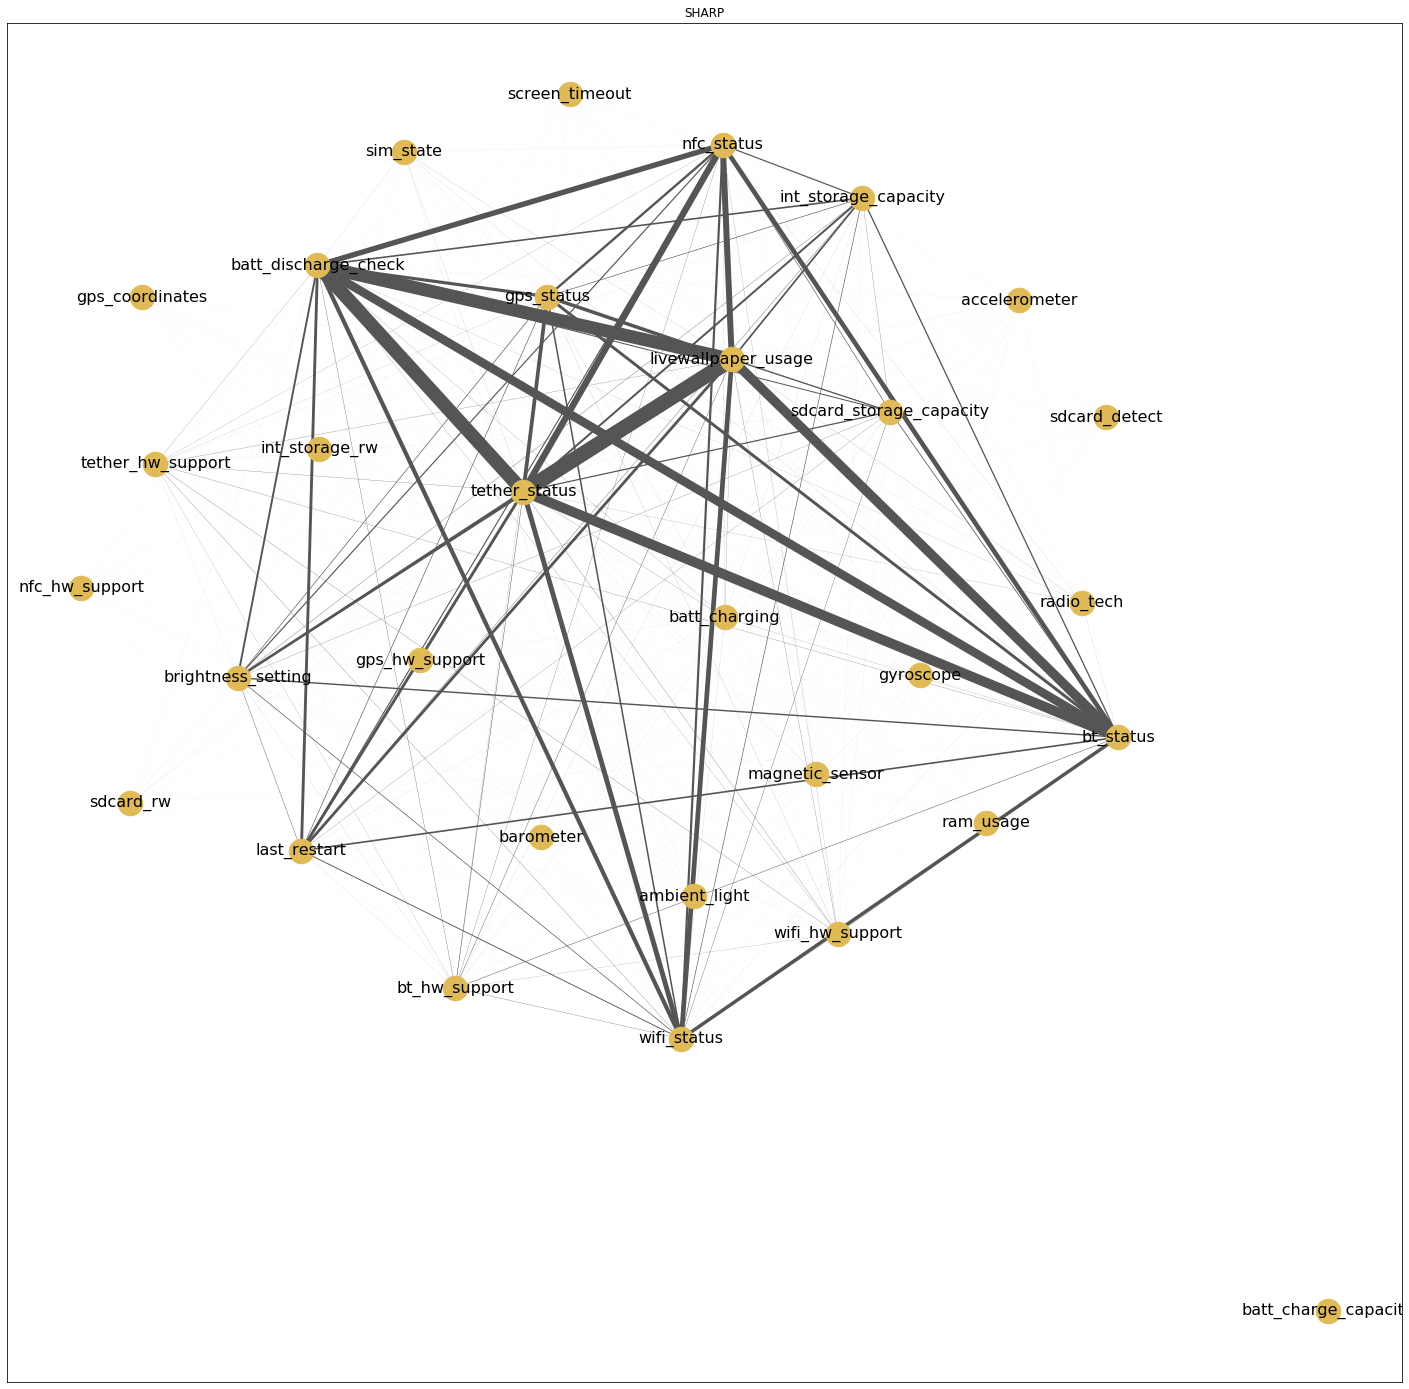

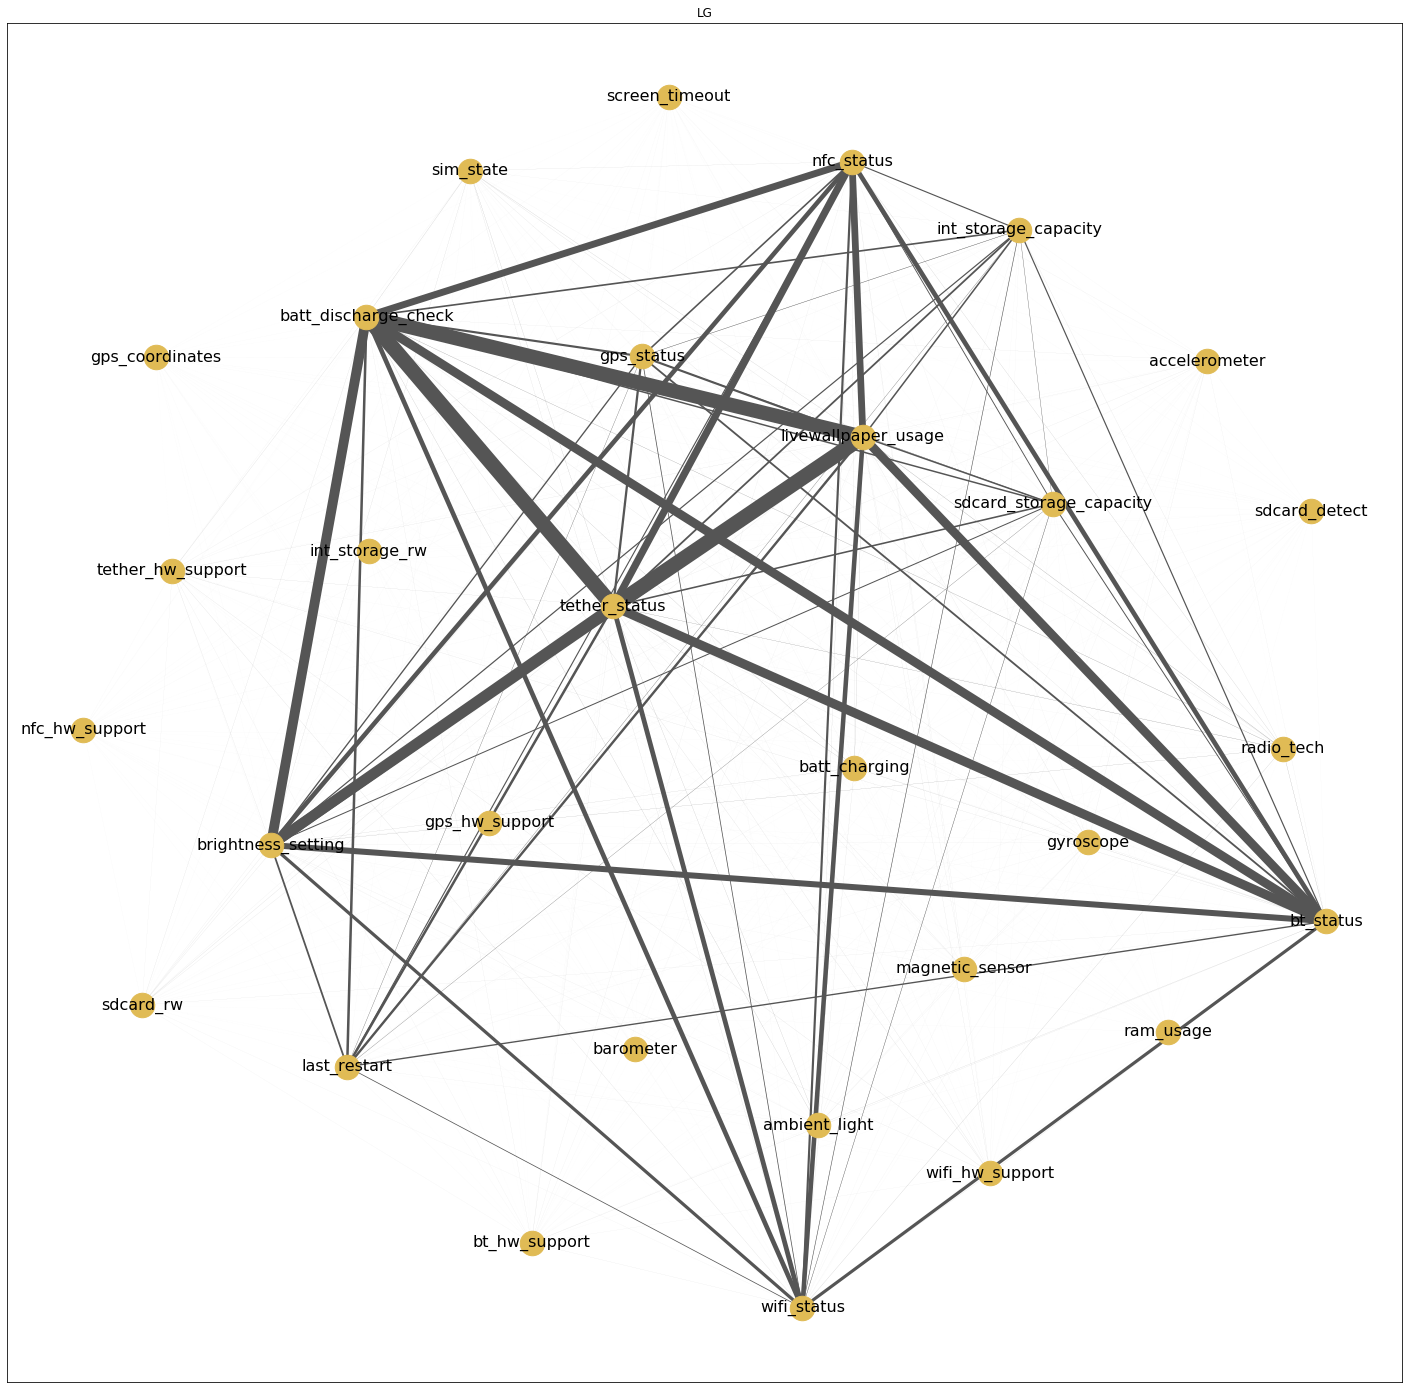

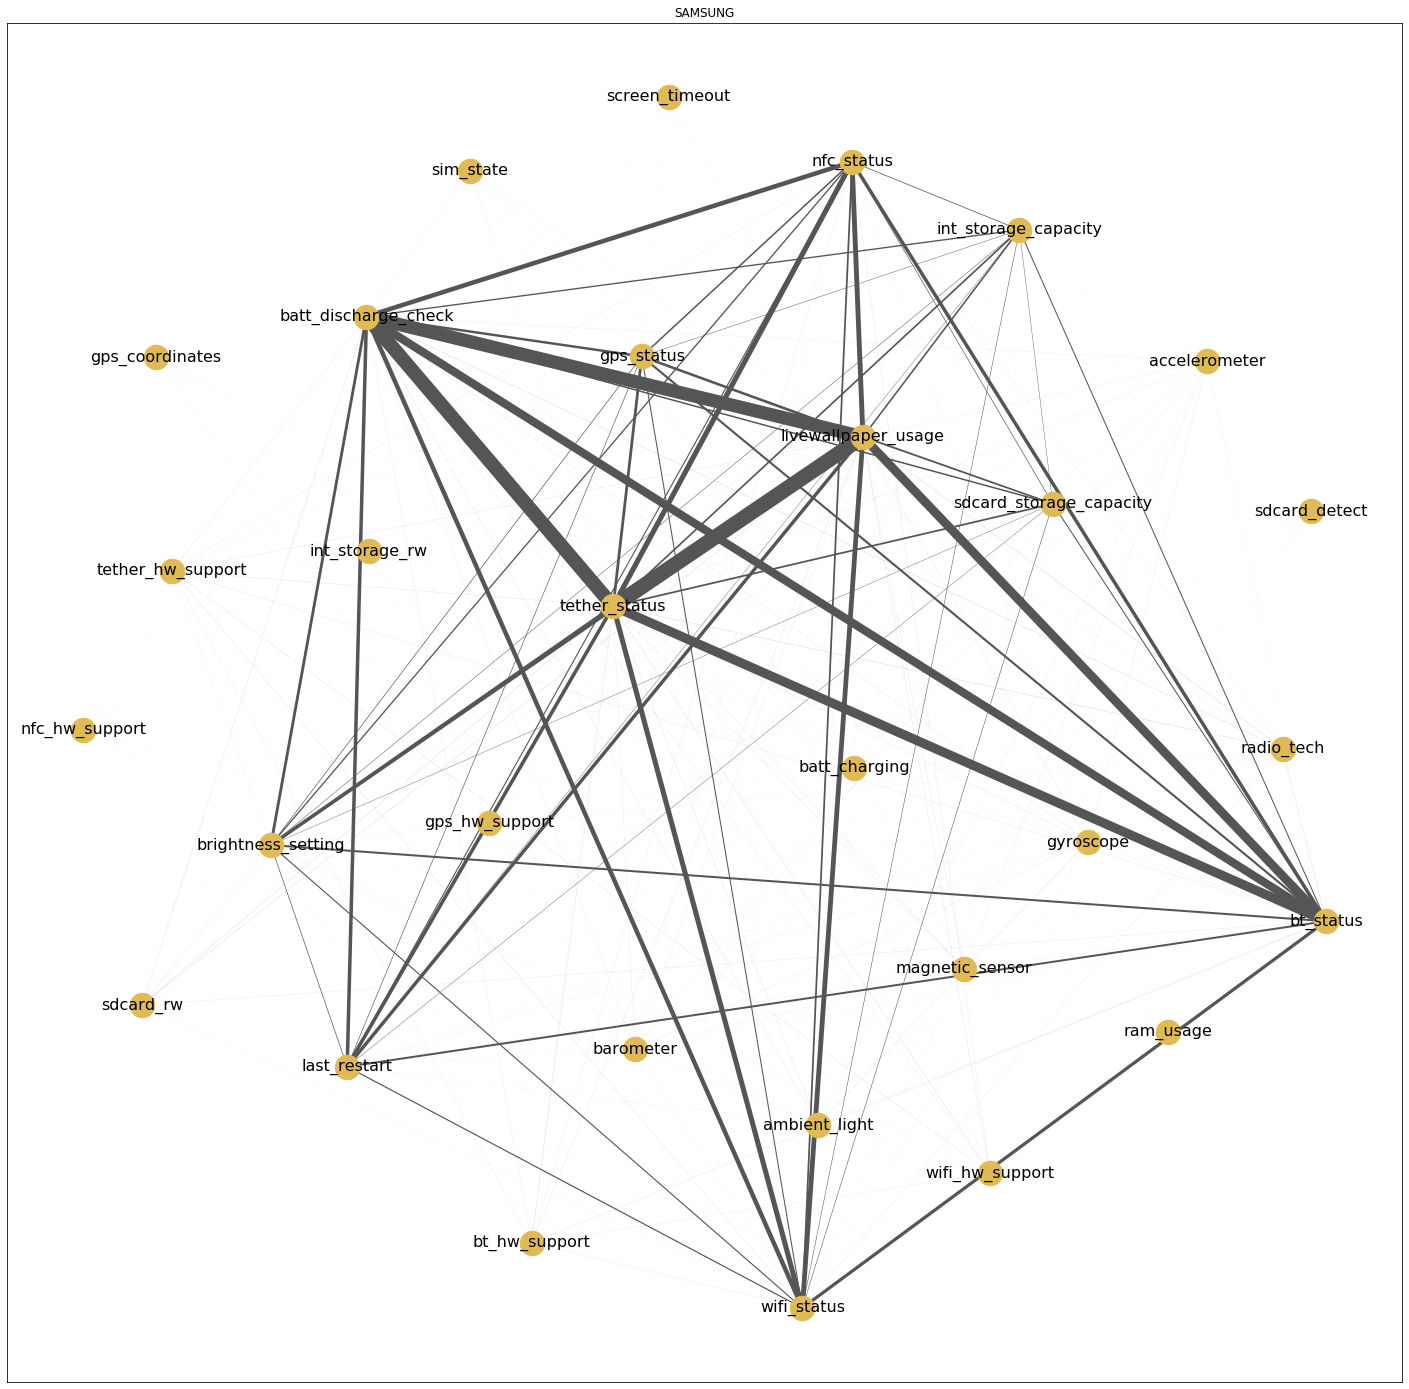

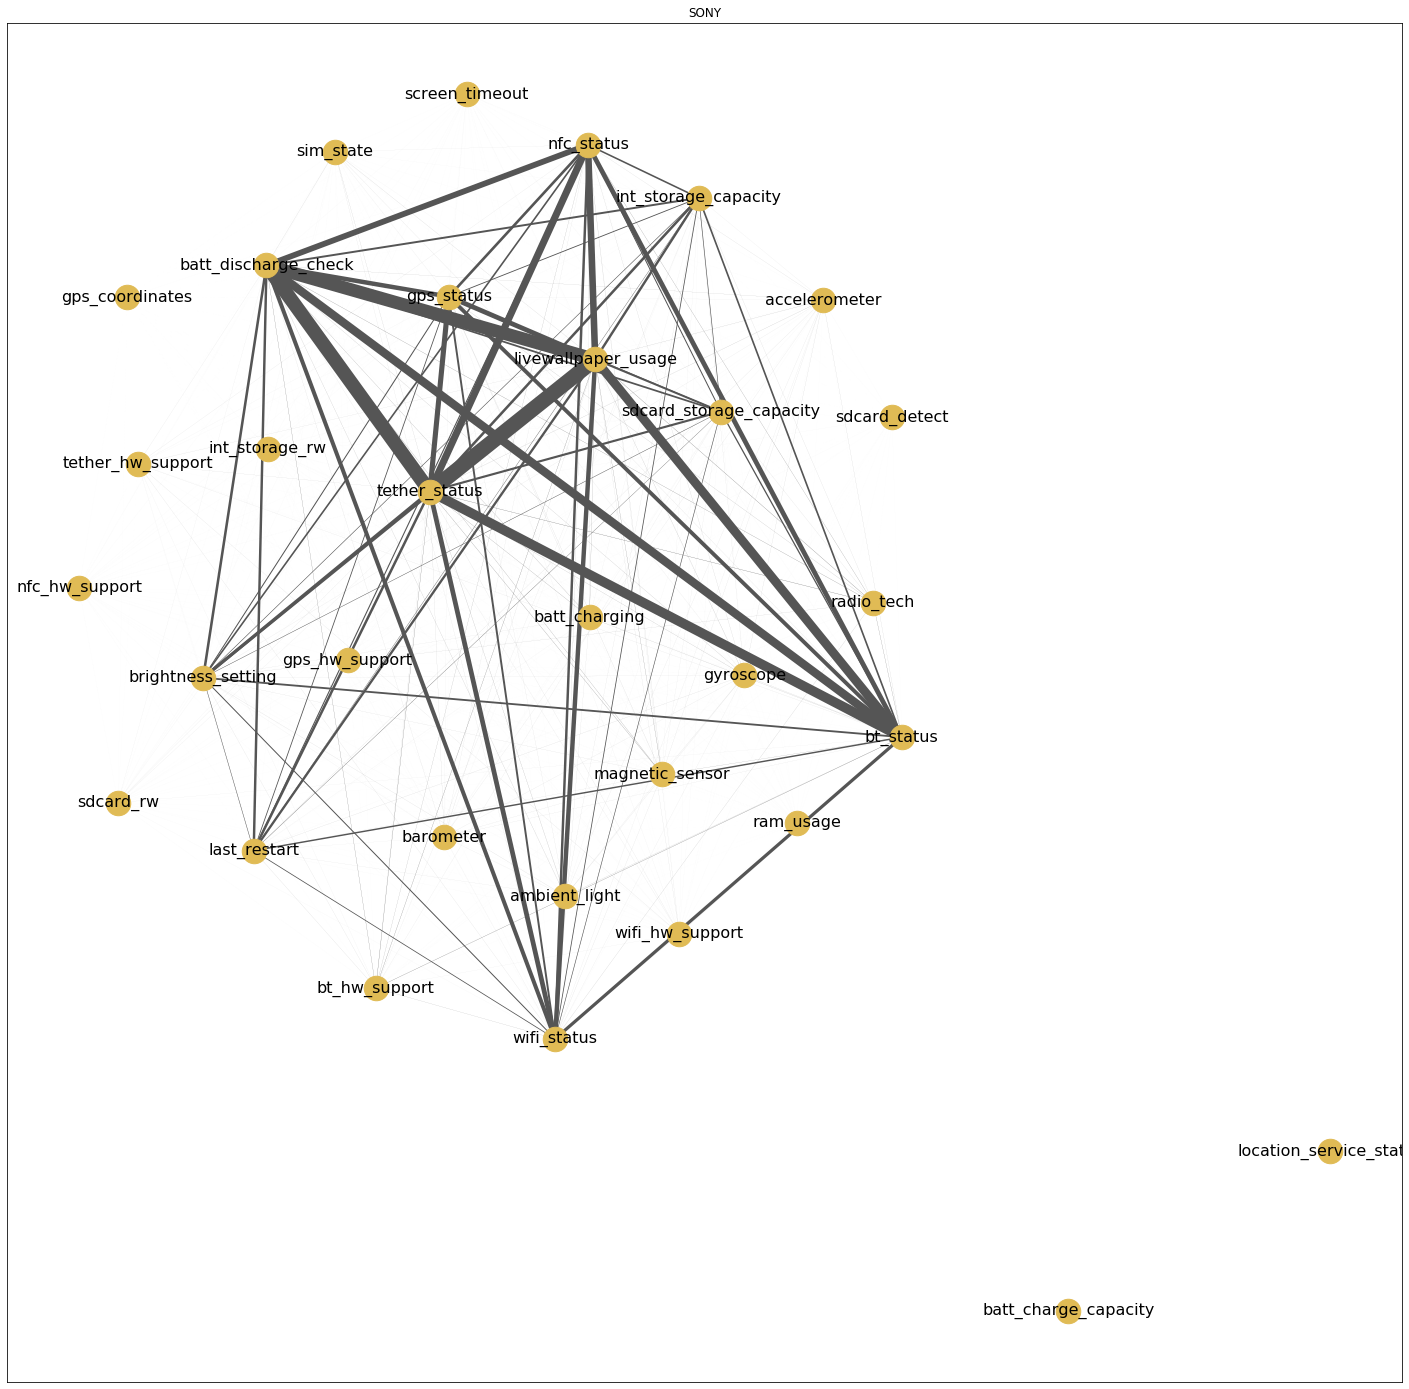

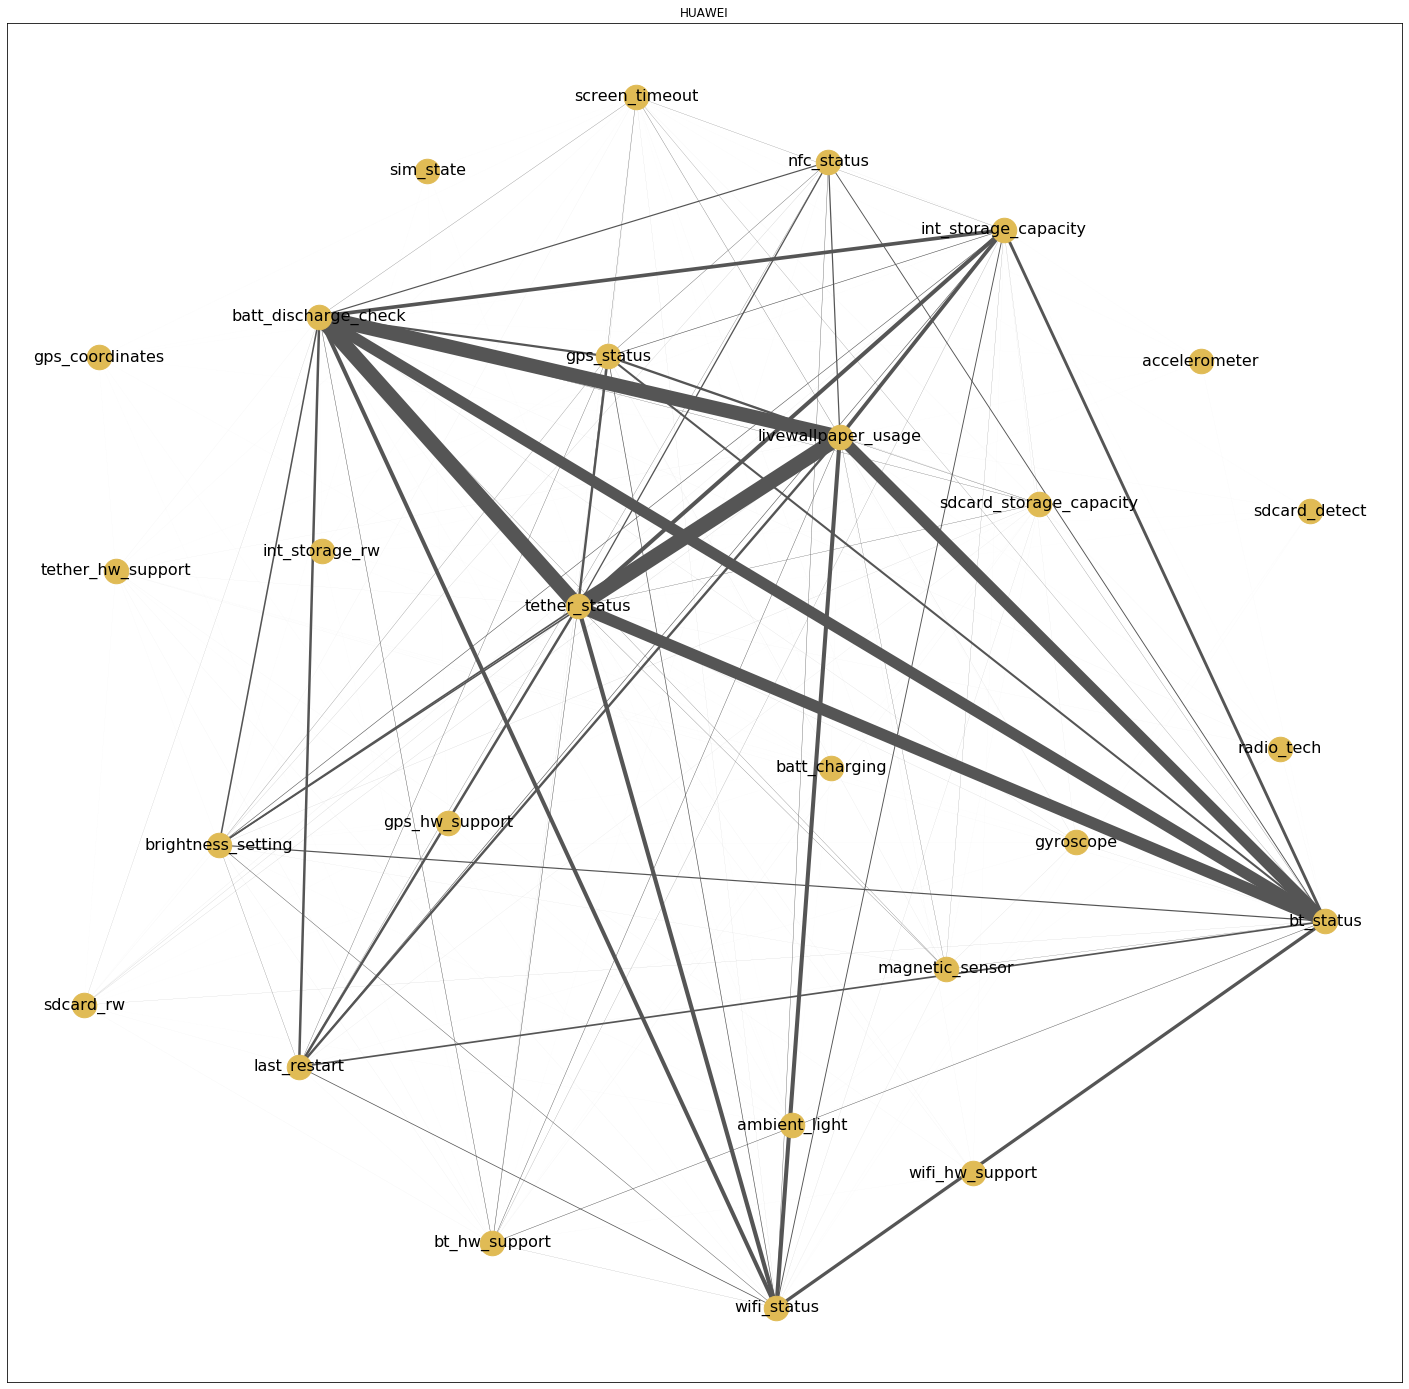

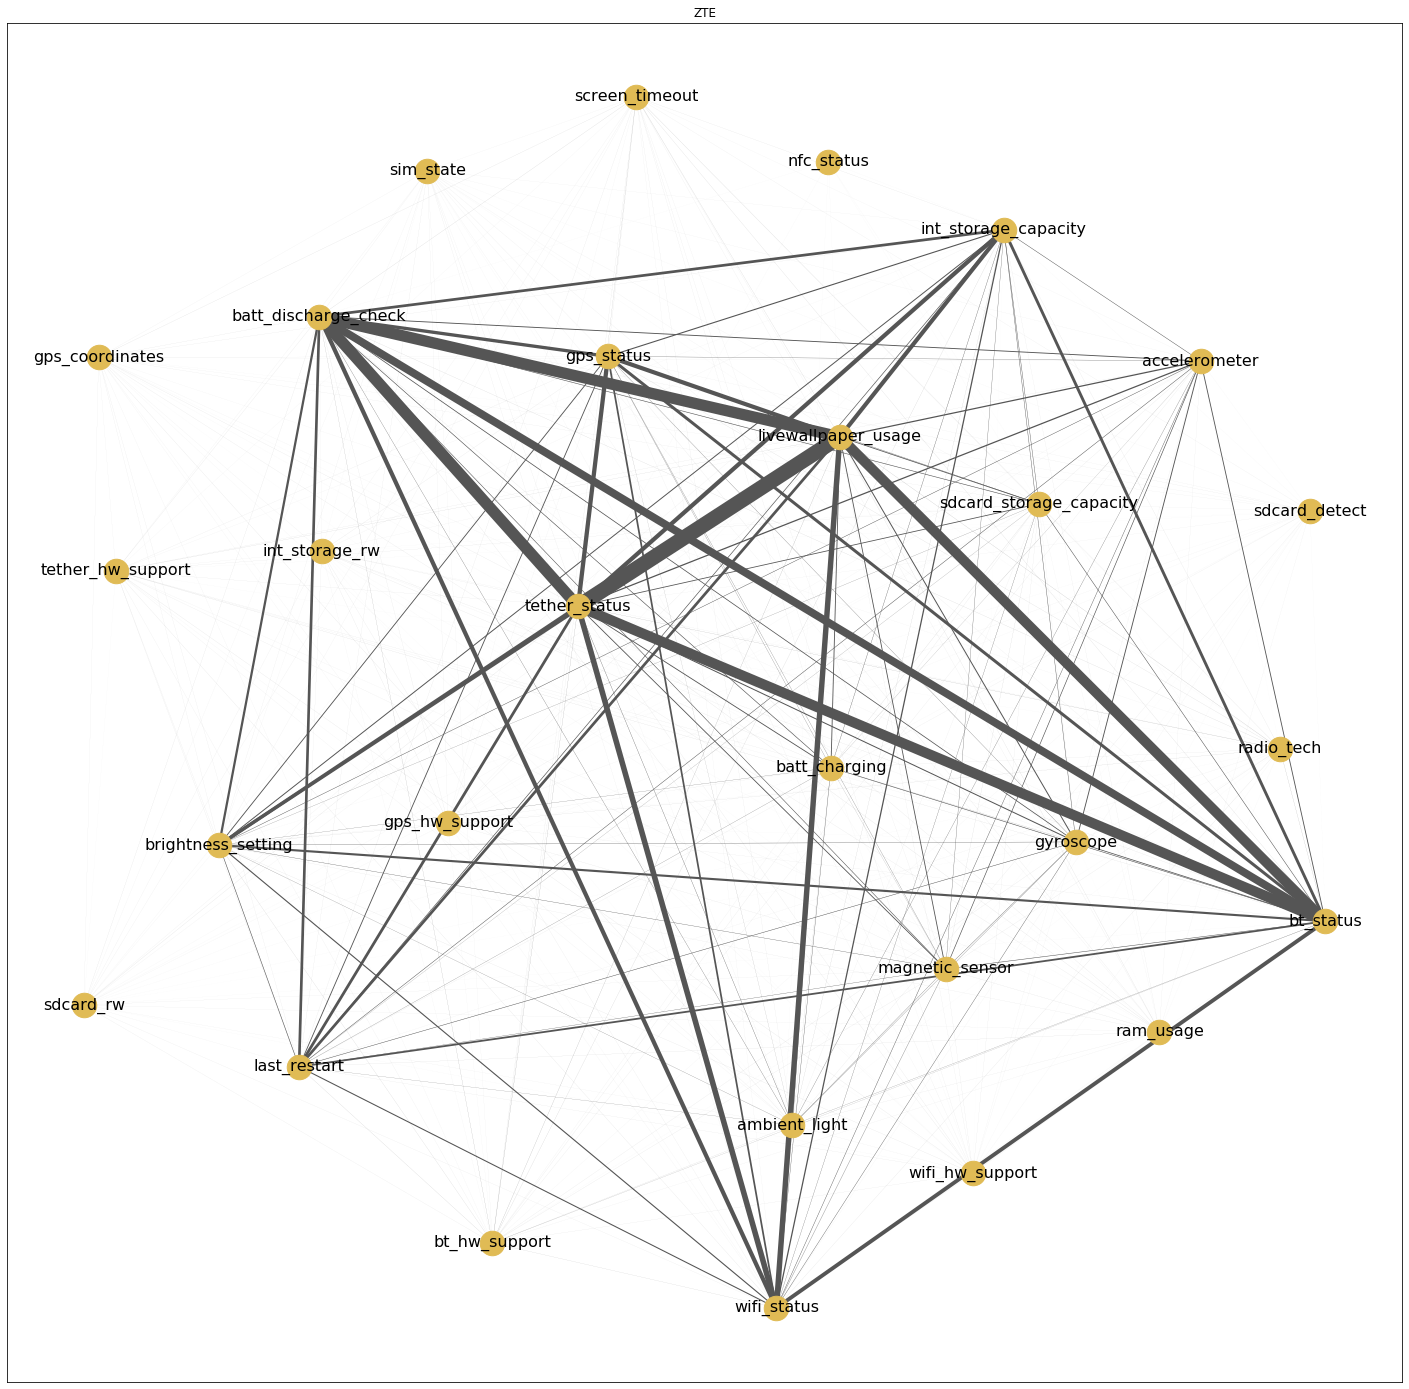

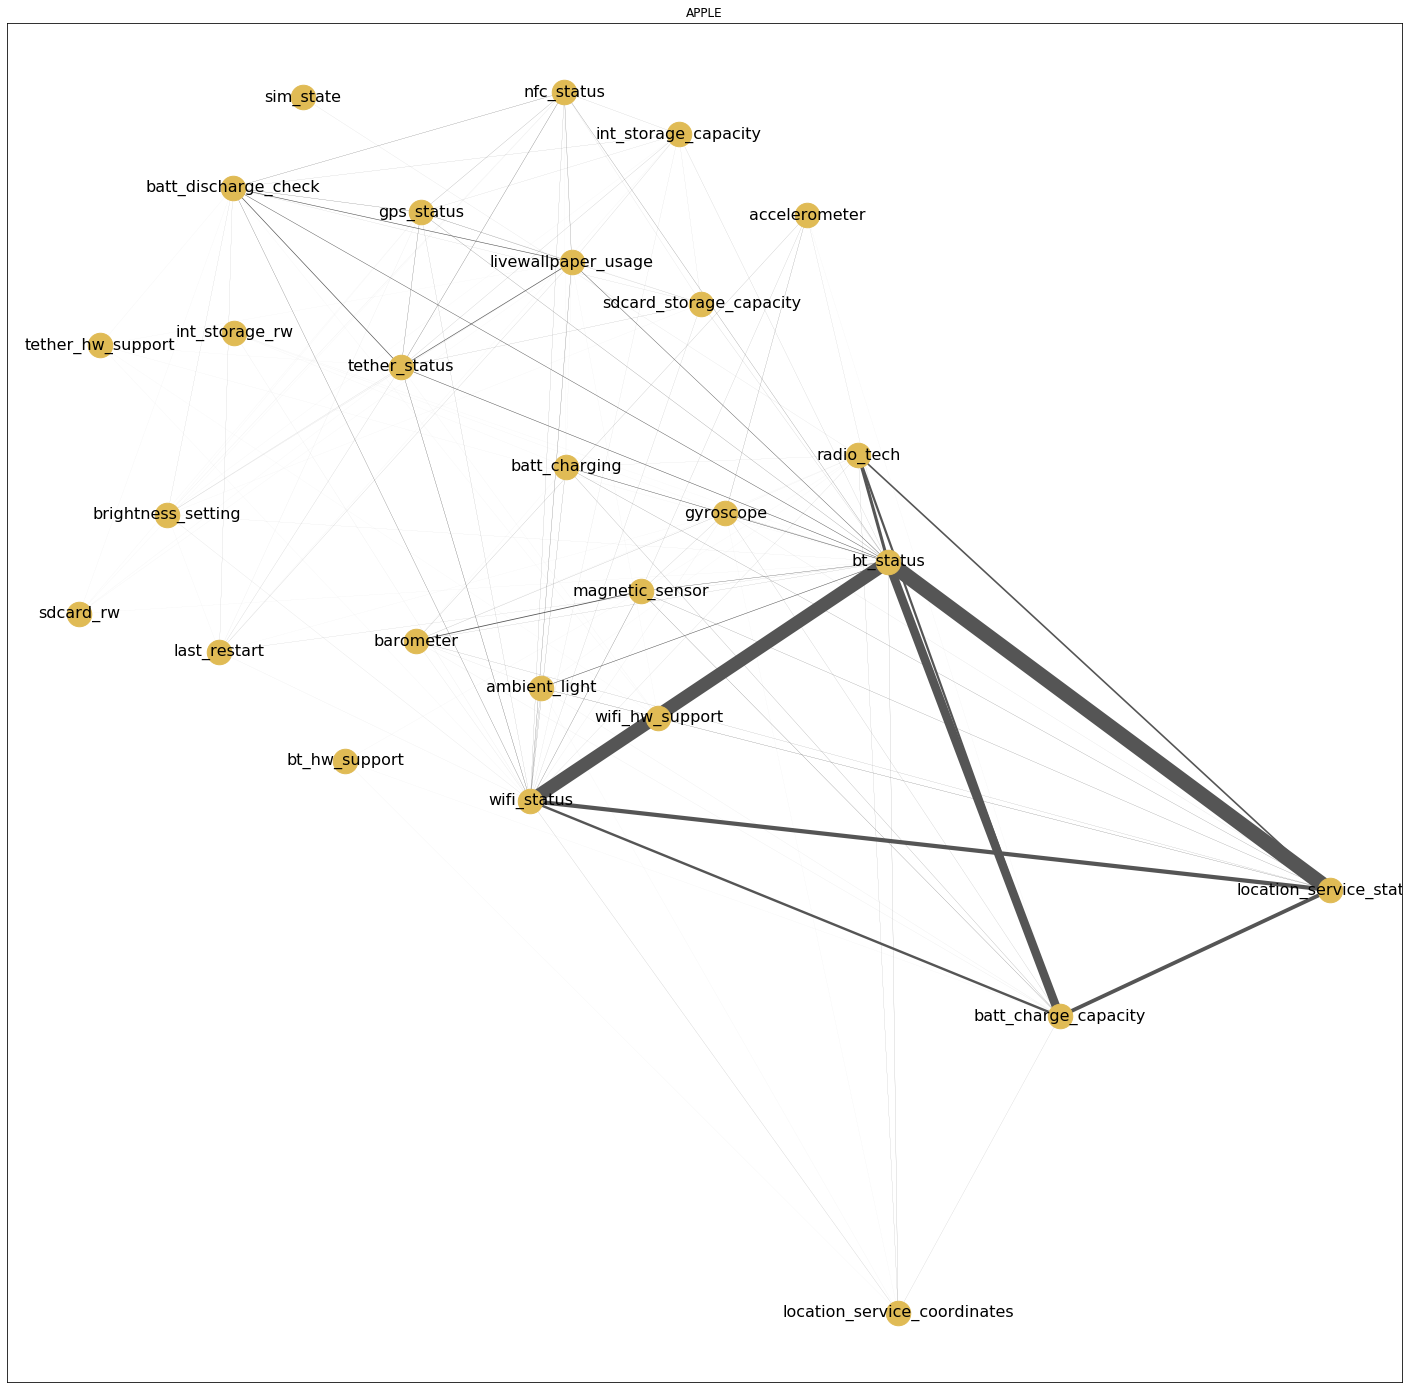

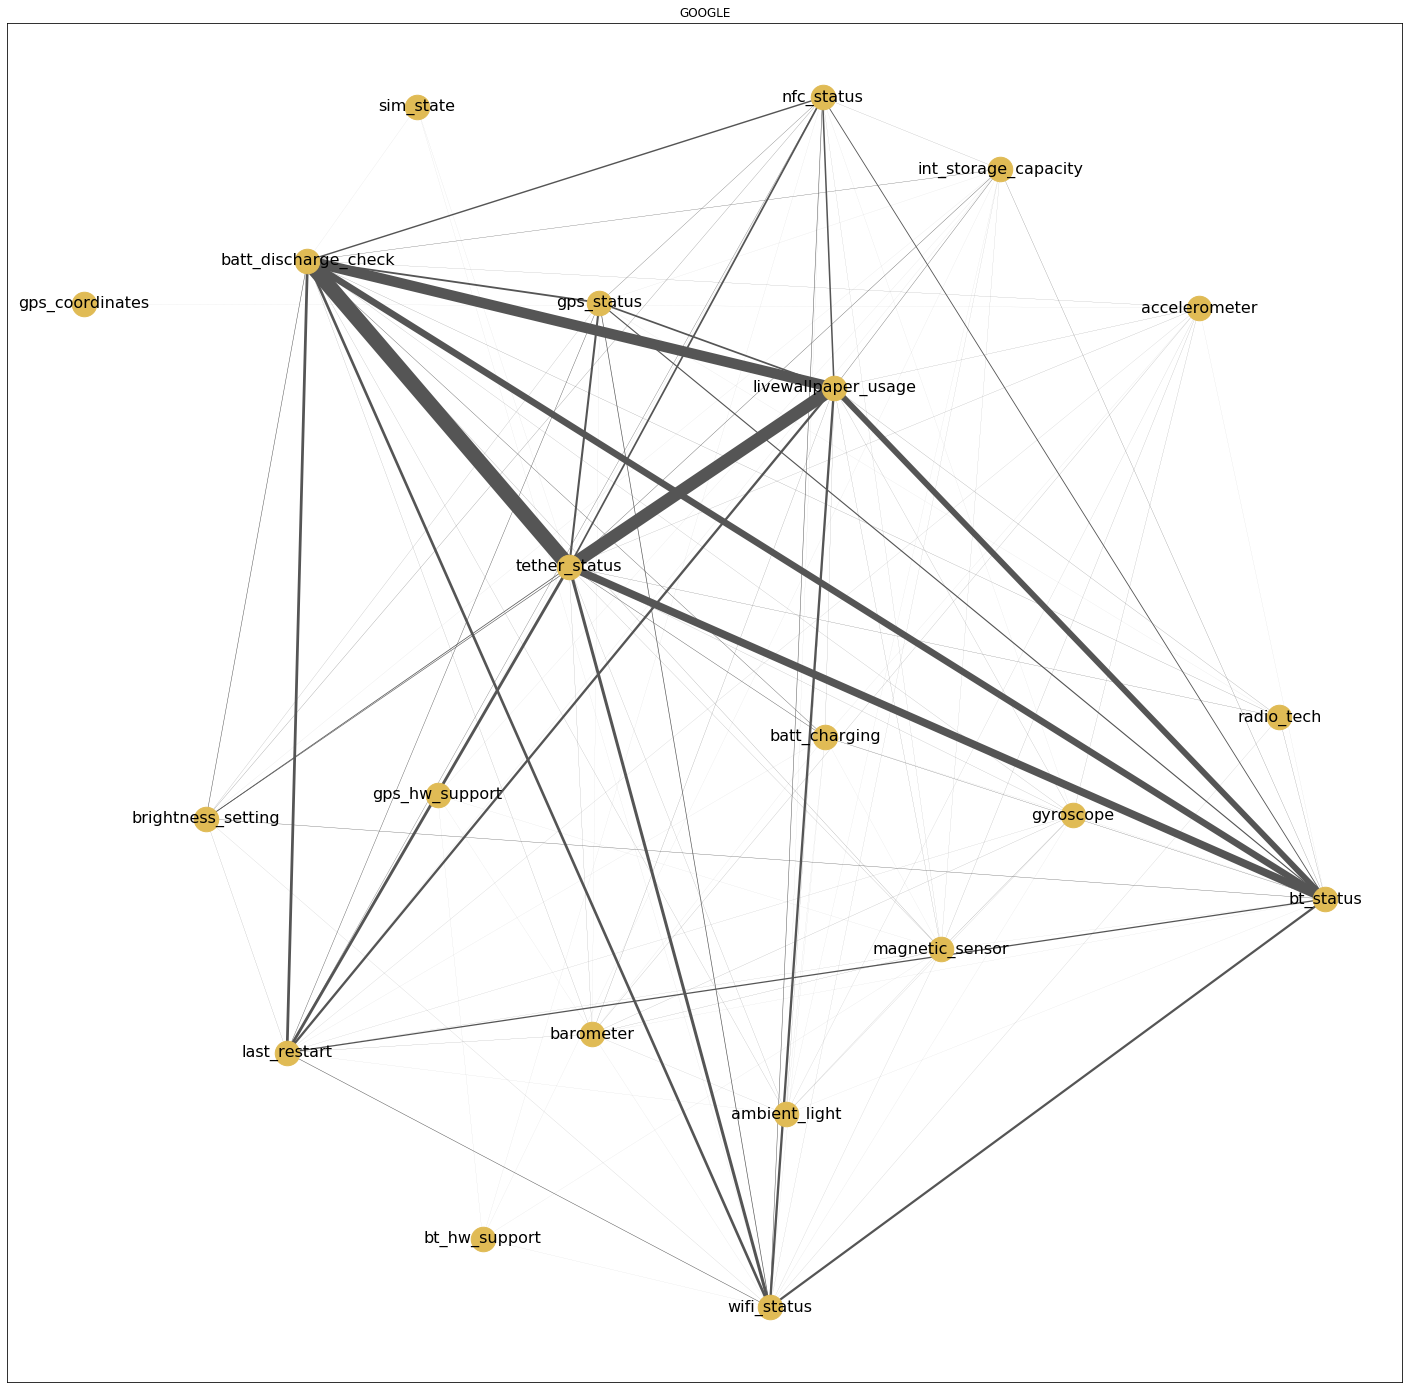

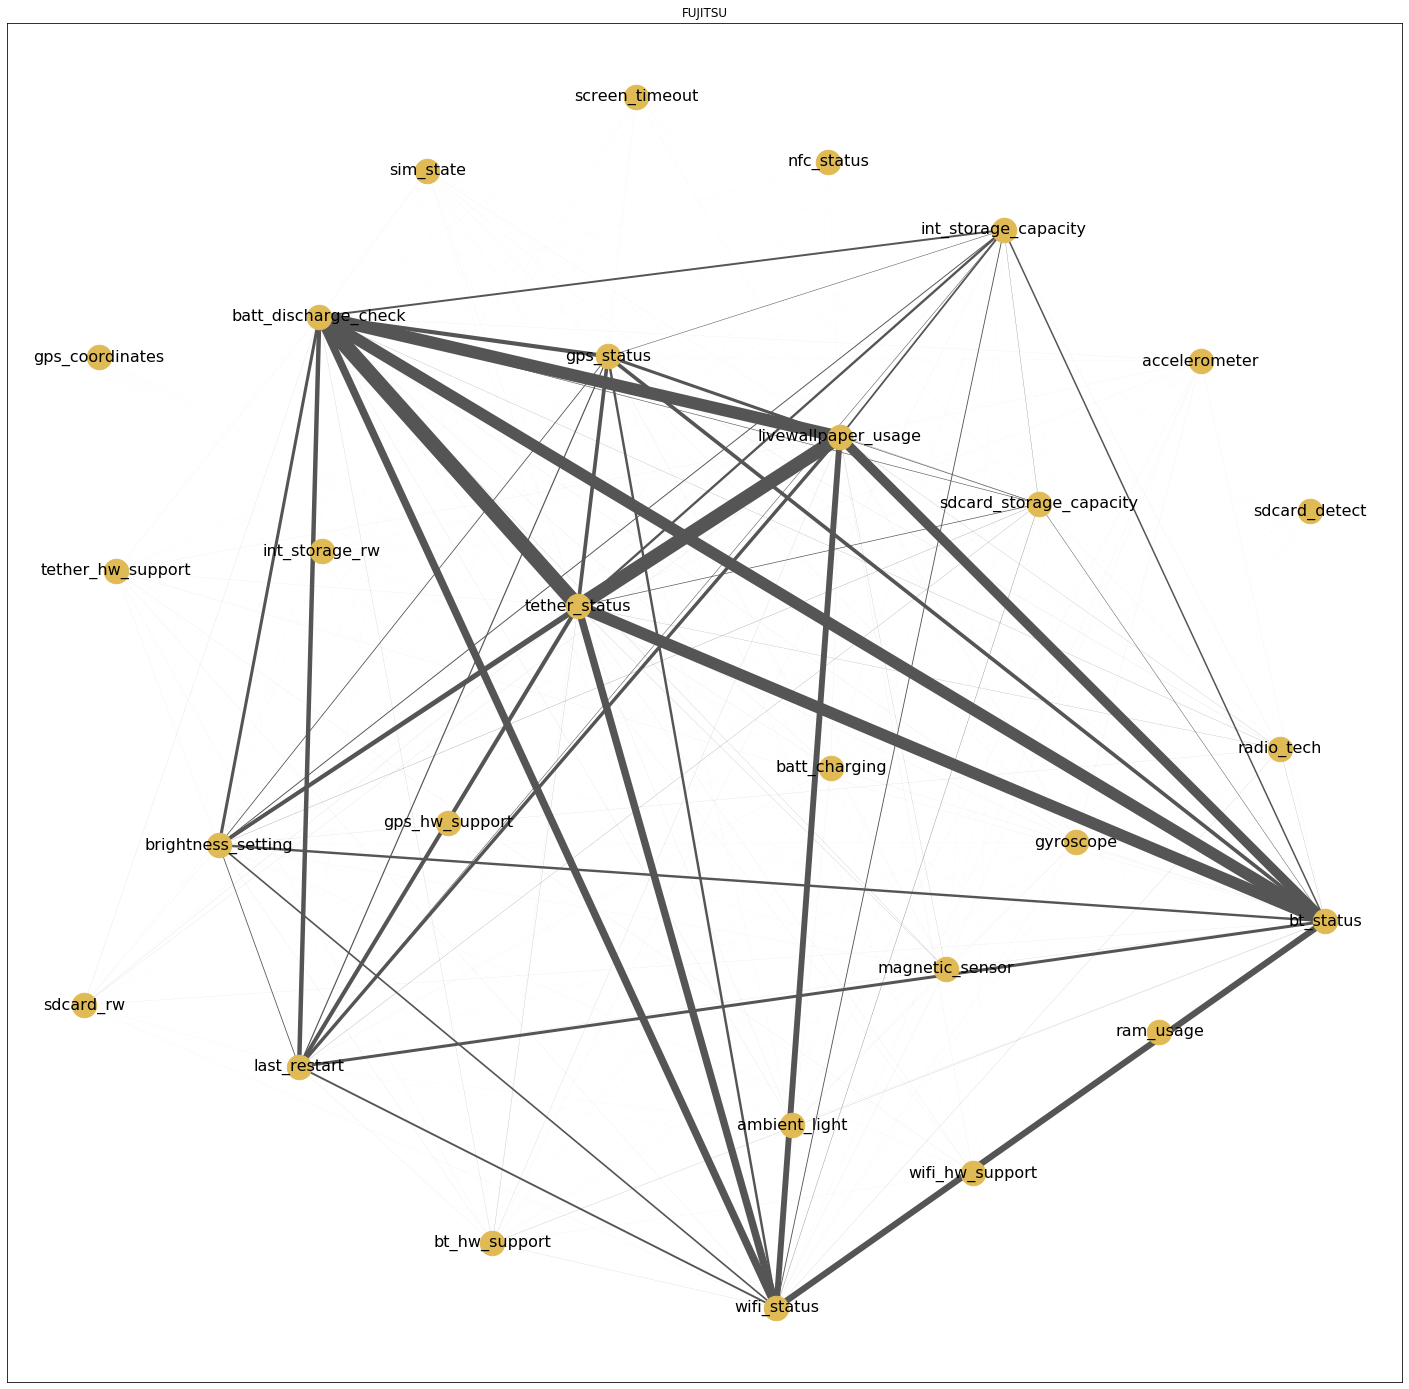

In [17]:
for i in range(1,len(model_list)+1):
    print_graph(model_df,model_list[i-1],pos)

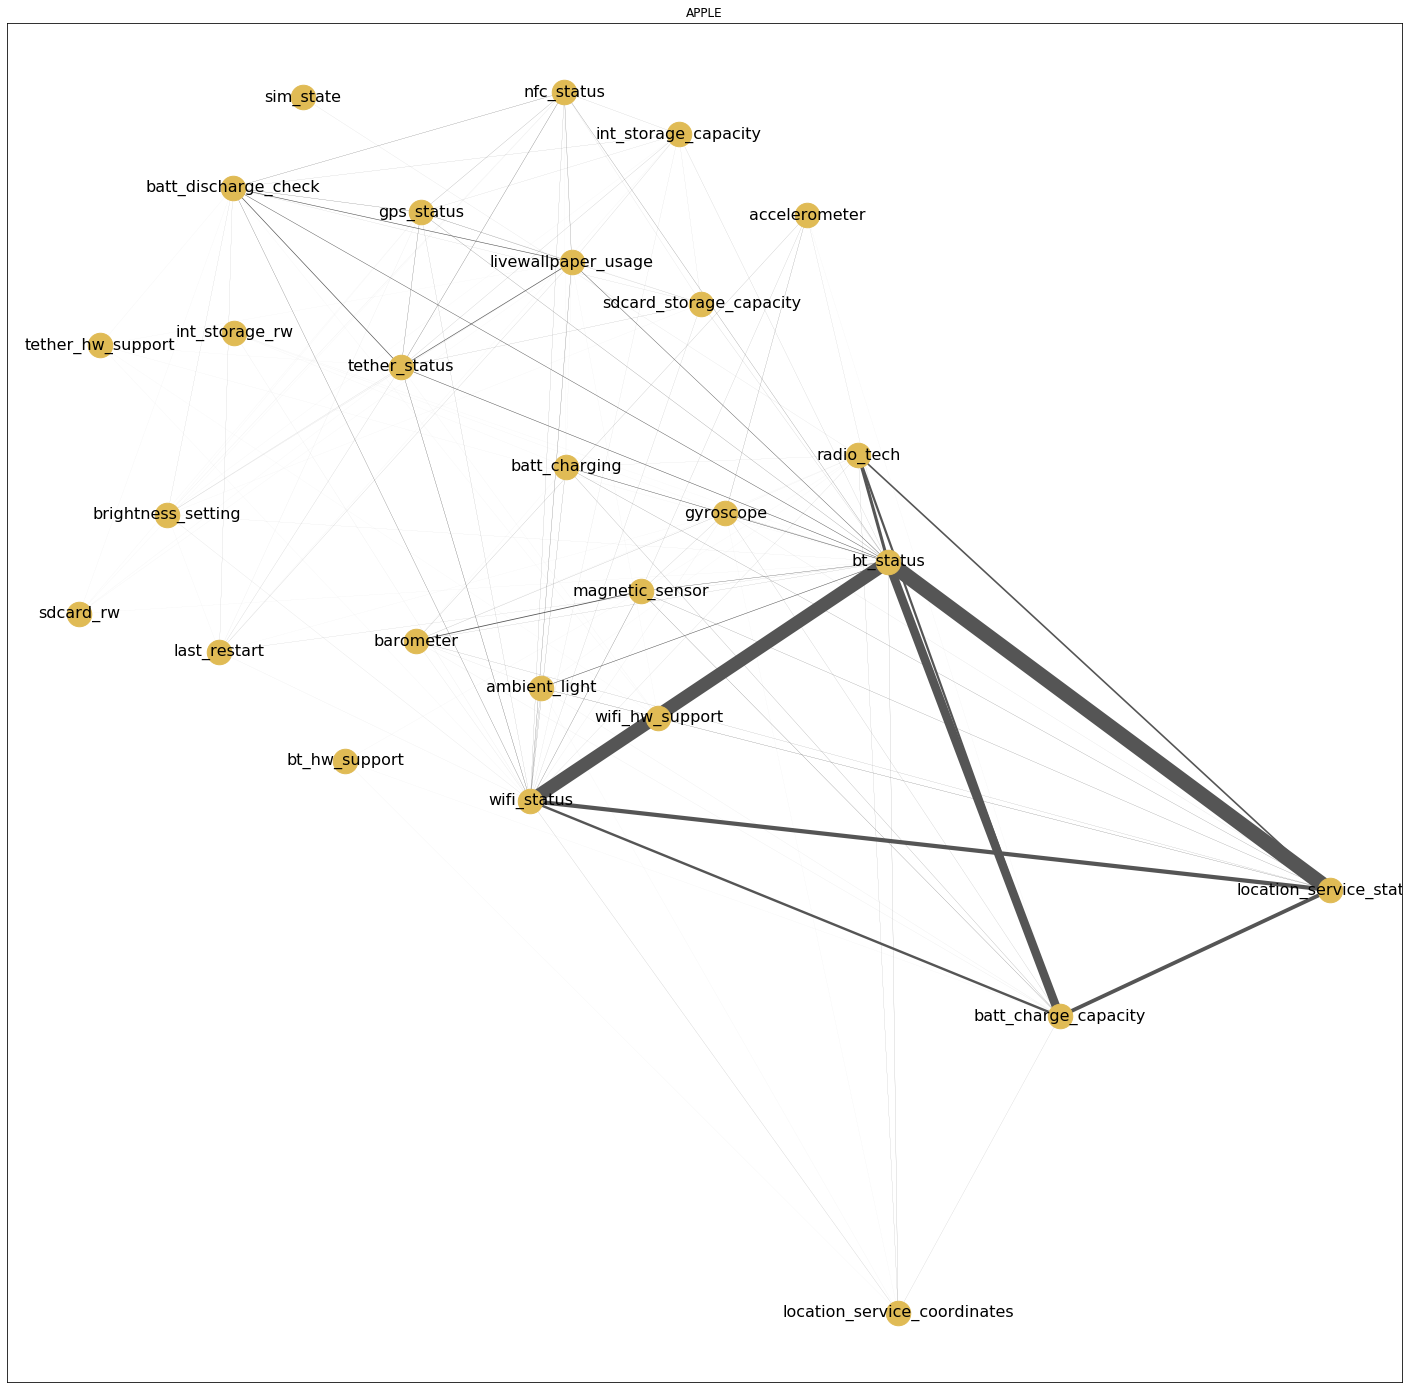

In [20]:
print_graph(model_df,"APPLE",pos)